In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(0)

## Creating the Dataset

This dataset will be generated randomly to classify into -1 or 1 based on 2 features.

In [3]:
dog_whisker_length = np.random.normal(loc = 5 , scale = 1 , size = 10 )
dog_ear_flappiness_index = np.random.normal(loc = 8 , scale = 1 , size = 10 )

In [4]:
cat_whisker_length = np.random.normal(loc = 8 , scale = 1 , size = 10 )
cat_ear_flappiness_index = np.random.normal(loc = 5 , scale = 1 , size = 10 )

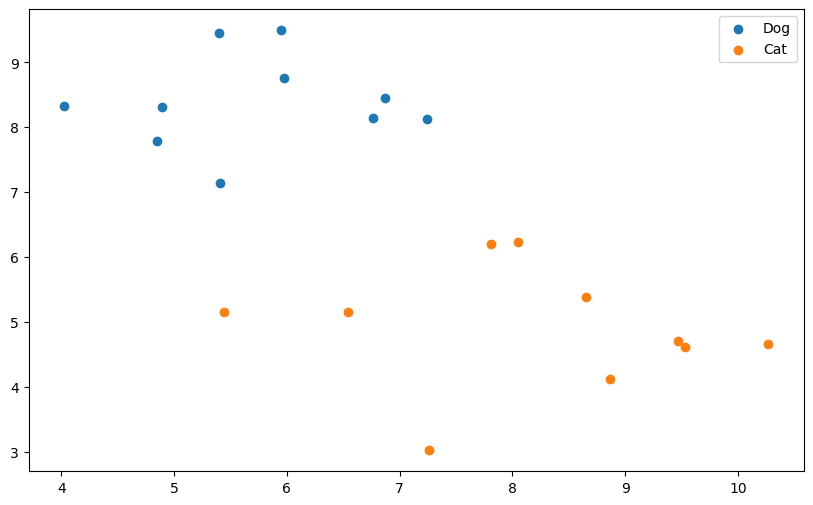

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(dog_whisker_length,dog_ear_flappiness_index, label = 'Dog')
plt.scatter(cat_whisker_length,cat_ear_flappiness_index, label = 'Cat')
plt.legend()

Creating the dataset for training


In [6]:
dog_whisker_length.shape

(10,)

In [7]:
dogs_data = np.vstack((dog_whisker_length,dog_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length,cat_ear_flappiness_index)).T

In [8]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [9]:
d = dogs_data.shape[1]

## Creating the Algorithm

### 1. Creating the error/loss function 

In [10]:
ar = np.random.normal(size = 2 )
br = np.array([1,1])

In [11]:
for i in dogs_data :
    print(i)

[6.76405235 8.14404357]
[5.40015721 9.45427351]
[5.97873798 8.76103773]
[7.2408932  8.12167502]
[6.86755799 8.44386323]
[4.02272212 8.33367433]
[5.95008842 9.49407907]
[4.84864279 7.79484174]
[4.89678115 8.3130677 ]
[5.4105985  7.14590426]


In [12]:
for i in dogs_data: 
    print(np.dot(i, br))

14.908095917128541
14.8544307153302
14.739775709252733
15.362568215694285
15.311421222895392
12.356396447497856
15.444167490683196
12.6434845279365
13.209848849857345
12.556502762636647


In [13]:
def compute_error(dogs_data, cats_data, weight_vector, bias ): 
    
    # creating the arguements for weight vector and bias so that this function can be used
    # in checking the optimum weight_vector and bias on new data 
    
    error = 0 
    
    for i in dogs_data:
        if np.sign(np.dot(weight_vector,i) + bias) <= 0 :
            error += 1
        else :
            None 

    for i in cats_data:
        if np.sign(np.dot(weight_vector,i) + bias) >= 0 :
            error += 1

    return error, weight_vector, bias                   

In [14]:
# testing the fucntion 
weight_vector = np.random.normal(size = d)
bias = np.random.normal()

compute_error(dogs_data,cats_data,weight_vector,bias)

(1, array([-1.70627019,  1.9507754 ]), -0.5096521817516535)

## 2. Random Linear Classifier Algorithm (Learning Algorithm)

In [15]:
def random_lin_classifier(dogs_data,cats_data, k , d ):
    min_error = float('inf')
    best_weight_vector = None 
    best_bias = None

    for i in range(1,k):
        weight_vector = np.random.normal(size = d)
        bias = np.random.normal()
        error, weight_vector, bias = compute_error(dogs_data, cats_data, weight_vector, bias)
        if error < min_error:
            min_error = error 
            best_weight_vector = weight_vector
            best_bias = bias 
    
    return min_error, best_weight_vector, best_bias

In [16]:
min_error, best_weight_vector, best_bias= random_lin_classifier(dogs_data,cats_data, 100 , 2 )

In [17]:
min_error

0

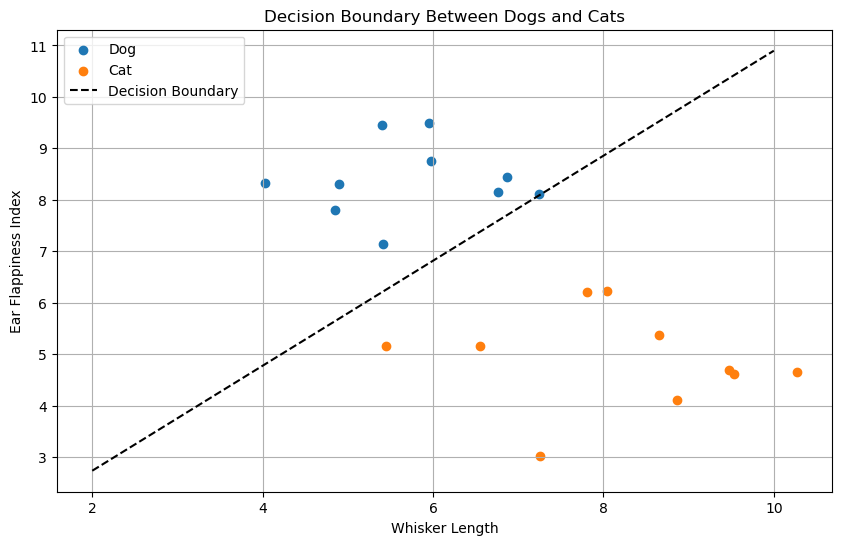

In [18]:
# Convert weight and bias to variables for clarity
w = best_weight_vector  # should be a 2-element array or list
b = best_bias

# Create figure
plt.figure(figsize=(10, 6))

# Plot data
plt.scatter(dog_whisker_length, dog_ear_flappiness_index, label='Dog')
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label='Cat')
x_vals = np.linspace(2, 10, 100)
y_vals = (-w[0] / w[1]) * x_vals - (b / w[1])

# Plot the decision boundary
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

# Labels and title
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Decision Boundary Between Dogs and Cats")
plt.legend()
plt.grid(True)
plt.show()

## 3. Checking the effectiveness of the model by splitting the data in train and test dataset

creating usable dataset

In [19]:
dogs_data = np.vstack((dog_whisker_length,dog_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length,cat_ear_flappiness_index)).T
data = np.vstack((dogs_data,cats_data))

Let the class of the dog be "1" and "0" for cat.

In [20]:
dog_label = np.ones (len(dogs_data))
cat_label = np.zeros (len(cats_data))
labels = np.hstack((dog_label,cat_label))
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
x_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

In [27]:
y_train

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.])

In [28]:
min_error_train, best_weight_vector_train, best_bias_train = random_lin_classifier(x_train[y_train == 1], x_train[y_train == 0], 100 , 2 )
min_error_train

0

- Checking on the test data 

In [29]:
error_test, weight_vector_test, bias_test = compute_error(x_test[y_test == 1], x_test[y_test == 0], best_weight_vector_train, best_bias_train )
print(f"Then error on Test Data : {error_test}")

Then error on Test Data : 0


### Summary of learnings till now 
- Learned how to create arrays using numbers random from a normal distribution using numpy.
- To prepare create a usable matrix using the vstack functions and transpose 
- understood the basic flow of the process. i.e to create a loss function, create a algo function, training to output optimal parameters and then test out the parameters on test dataset.
- got to learn how to use sklearn function for splitting the dataset into test and train
  

### Cross validation to find optimum k value (Additional)

In [30]:
from sklearn.model_selection import train_test_split, KFold

In [31]:
#examples 
kf = KFold( n_splits = 5, shuffle = True, random_state = 42)

print("We get the index from the split function ")
for train_index , test_index in kf.split([1,23,234,2,4,23,3,3]):
    print (train_index, test_index)
    # print()

We get the index from the split function 
[0 2 3 4 6 7] [1 5]
[1 2 3 4 5 6] [0 7]
[0 1 3 5 6 7] [2 4]
[0 1 2 4 5 6 7] [3]
[0 1 2 3 4 5 7] [6]


In [32]:
def cross_validation(dogs_data, cats_data, kvalues, d, splits  = 5 ) :
    kf = KFold( n_splits = splits, shuffle = True, random_state = 42)
    avg_err = []
    resultdict = { "kvalues" : kvalues , "avg_err" : avg_err }
    
    for k in kvalues :
        errors = []

        for train_index, test_index in kf.split(dogs_data):
            x_train_fold = np.vstack((dogs_data[train_index], cats_data[train_index]))
            y_train_fold = np.hstack((np.ones(len(train_index)), np.zeros(len(train_index))))
            x_val_fold   = np.vstack((dogs_data[test_index], cats_data[test_index]))
            y_val_fold   = np.hstack((np.ones(len(test_index)), np.zeros(len(test_index))))

            best_error, best_weight_vector, best_bias = random_lin_classifier(x_train_fold[y_train_fold == 1], x_train_fold[y_train_fold == 0], k , 2 )

            test_error, test_weight_vector, test_bias = compute_error(x_val_fold[y_val_fold == 1], x_val_fold[y_val_fold == 0], best_weight_vector, best_bias )
            
            errors.append(test_error)

        avg_err.append(np.mean(errors))

    best_k = kvalues[np.argmin(avg_err)]
    return  resultdict , best_k
    

    # return avg_err

lets try the cross validation function 

In [33]:
kvalues = [20,50,100,200,500,1000,1500,2000]
cross_validation(dogs_data, cats_data, kvalues, 2, splits  = 5 )

({'kvalues': [20, 50, 100, 200, 500, 1000, 1500, 2000],
  'avg_err': [0.8, 0.2, 0.0, 0.0, 0.4, 0.4, 0.0, 0.0]},
 100)

The optimum k value is 100